In [3]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import collections

In [4]:
#TOIVONEN MODEL SOCIAL NETWORK
def newSocialNetwork(m0,mr,ms,Nmax,p):
    
    G = nx.erdos_renyi_graph(m0,p)
    N=m0
    #start with random network
    for i in range (Nmax-m0): #grow to desired size
        G.add_node(m0+i) 
        for node in G.nodes():
            x=np.random.rand()
            if x<=(mr/N): #probability of selecting a node as an initial contact
                G.add_edge(node,m0+i)
                for neighbor in G.neighbors(node): #probability of selecting the neighbour of an initial contact as a secondary contact
                    y=np.random.rand()
                    if y<=(ms/N):
                        G.add_edge(neighbor,m0+i)
        N=G.number_of_nodes()
        
        attr=dict()
        for node in G.nodes():
            nodeDict=dict()
            nodeDict["coop"]=float('%.0f' %np.random.rand())
            attr[node]=nodeDict
        
        nx.set_node_attributes(G, attr)
        
        attrEdge=dict()
        for edge in G.edges():
            edgeDict=dict()
            edgeDict["weight"]=float('%.3f' %np.random.rand()) #random sulyozas -> de ezt kesobb lehetne varialni...
            attrEdge[edge]=edgeDict
            
        nx.set_edge_attributes(G, attrEdge)
        
    return(G)

In [49]:
def randomize(G,f): #HOW ASSORTATIVE IS THE NETWORK? Using the randomized (rewired) version as a benchmark for comparison.
    
    N=nx.number_of_nodes(G)
    for i in range(int(f*N)): #f is the extent of rewiring
        nodes=np.random.choice(G.nodes(),2,replace=False) #choose two nodes randomly
        if list(G.neighbors(nodes[0])) != [] and list(G.neighbors(nodes[1])) != []: #chosen nodes must have neighbours
            neighbor1=int(np.random.choice(list(G.neighbors(nodes[0]))))
            neighbor2=int(np.random.choice(list(G.neighbors(nodes[1]))))
            if neighbor1 not in nodes and neighbor2 not in nodes:
                #SWITCH LINKS
                G.remove_edge(nodes[0],neighbor1)
                G.add_edge(nodes[1],neighbor1)
                G.remove_edge(nodes[1],neighbor2)
                G.add_edge(nodes[0],neighbor2)

    return G,nx.degree_pearson_correlation_coefficient(G)

In [56]:
fparam=np.arange(0.05,1,0.05)
assortativity=[]
for f in fparam:
    network,value=randomize(socialnetwork,f)
    assortativity.append(value)

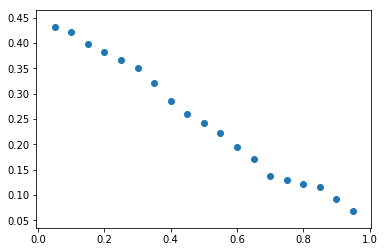

In [57]:
plt.scatter(fparam,assortativity)
plt.show()

In [62]:
instances = 500
randcorrelation=0
soccorrelation=0
for x in range(instances):
    randomgraph=nx.erdos_renyi_graph(500,0.02)
    randcorrelation += nx.degree_pearson_correlation_coefficient(randomgraph)
    socialnetwork=newSocialNetwork(10,3,5,500,0.8)
    soccorrelation += nx.degree_pearson_correlation_coefficient(socialnetwork)

NameError: name 'instance' is not defined

In [63]:
randcorrelation /= instances
soccorrelation /= instances
print("Average correlation coefficient for random graph:", randcorrelation)
print("Average correlation coefficient for social network:", soccorrelation)

Average correlation coefficient for random graph: -0.0053463249030792056
Average correlation coefficient for social network: 0.40458547237357445
